In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
# 라벨 이름 (Fashion MNIST 10개 클래스)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

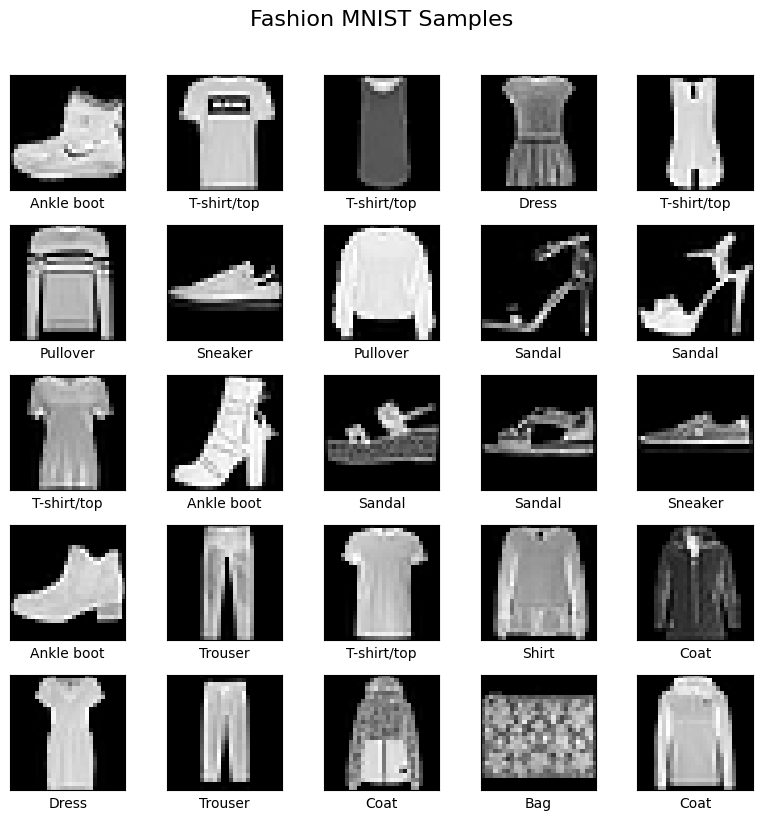

In [7]:
# 시각화 (첫 25개 이미지를 5x5로 출력)
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.suptitle('Fashion MNIST Samples', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [8]:
# 정규화 (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# DNN 모델 구성
model_dnn = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [10]:
# 컴파일
model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [11]:
# 학습
history_dnn = model_dnn.fit(x_train, y_train, epochs=10,
                            validation_split=0.1, batch_size=128, verbose=2)

Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.7785 - loss: 0.6233 - val_accuracy: 0.8512 - val_loss: 0.4008
Epoch 2/10
422/422 - 5s - 12ms/step - accuracy: 0.8422 - loss: 0.4391 - val_accuracy: 0.8590 - val_loss: 0.3845
Epoch 3/10
422/422 - 3s - 8ms/step - accuracy: 0.8559 - loss: 0.3988 - val_accuracy: 0.8722 - val_loss: 0.3600
Epoch 4/10
422/422 - 3s - 8ms/step - accuracy: 0.8652 - loss: 0.3726 - val_accuracy: 0.8680 - val_loss: 0.3593
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.8689 - loss: 0.3589 - val_accuracy: 0.8740 - val_loss: 0.3414
Epoch 6/10
422/422 - 4s - 10ms/step - accuracy: 0.8730 - loss: 0.3453 - val_accuracy: 0.8792 - val_loss: 0.3274
Epoch 7/10
422/422 - 4s - 10ms/step - accuracy: 0.8774 - loss: 0.3319 - val_accuracy: 0.8808 - val_loss: 0.3165
Epoch 8/10
422/422 - 3s - 8ms/step - accuracy: 0.8808 - loss: 0.3250 - val_accuracy: 0.8822 - val_loss: 0.3355
Epoch 9/10
422/422 - 5s - 11ms/step - accuracy: 0.8840 - loss: 0.3167 - val_accuracy: 0.8807 - val_loss: 0.3

In [12]:
# 평가
test_loss, test_acc = model_dnn.evaluate(x_test, y_test, verbose=2)
print(f"DNN Test Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8796 - loss: 0.3369
DNN Test Accuracy: 0.8796
